# Machine Learning with Python


## What is Machine Learning?

Machine Learning (ML) is a branch of computer science and data science that uses statistical and artificial intelligence methods to learn from and make predictions on data. The idea is that ML methods give the computer the ability to perform tasks that are not explicitly programmed - the computer "learns" how to perform these tasks. ML covers a wide range of algorithms like pattern recognition and classification. 

There are two underlying principles in ML algorithms:
* **supervised learning**: the computer is given a data sample to work on as well a sample of `labeled` training data; the computer learns from the training data and applies the learned rules to the data sample
* **unsupervised learning**: the computer is only given the data sample and searches for structure in it

Unsupervised learning is used in clustering methods and neural networks to identify structures in the data sample. Supervised learning is mostly used in classification methods that are quite common in many areas of research.

## Classification of Data

### Iris Data Sample

Iris is a flower (https://en.wikipedia.org/wiki/Iris_(plant)) whose blossom consists of petals and sepals. Iris subspecies can be identified based on the widths and lengths of the petals and sepals. We use different classification algorithms to classify an Iris data set.

The data is available from the `scikit-learn` (http://scikit-learn.org/stable/) module. If you don't yet have it installed, do so using `pip install sklearn`. Load the data and have a look at them:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets

### import iris dataset
iris = datasets.load_iris()

print iris.keys()


['target_names', 'data', 'target', 'DESCR', 'feature_names']


The dataset consists of a dictionary with different fields. Let's have a look at the description field (`DESCR`):

In [2]:
print iris.DESCR

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

The `data` field contains four attributes for the different iris specimen: sepal length in cm, sepal width in cm, petal length in cm, petal width in cm.

The `target` field contains the subspecies for each element in `data`; the integers in `target` refer to the indices of the subspecies names in `target_names`.

In [3]:
print 'species:', iris.target_names

print 'element 0 properties:', iris.data[0]
print 'subspecies index of element 0:', iris.target[0]
print 'subspecies name of element 0:', iris.target_names[iris.target[0]]

species: ['setosa' 'versicolor' 'virginica']
element 0 properties: [ 5.1  3.5  1.4  0.2]
subspecies index of element 0: 0
subspecies name of element 0: setosa


Plot the lengths and the widths for the different species:

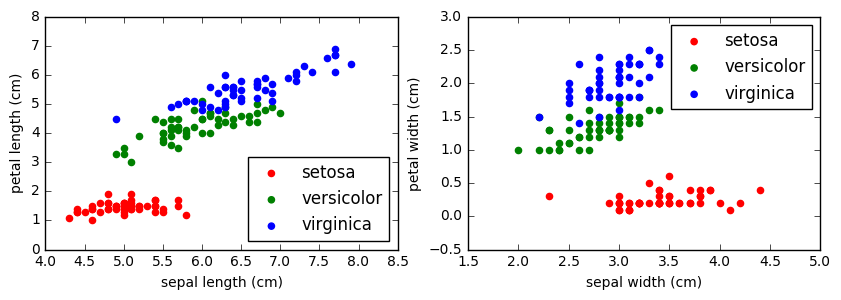

In [4]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,3))

colors = ['red', 'green', 'blue']

for specimen in range(3):  
    ax1.scatter(iris.data[iris.target==specimen][:,0], iris.data[iris.target==specimen][:,2],
                color=colors[specimen], label=iris.target_names[specimen])
    ax1.set_xlabel('sepal length (cm)')
    ax1.set_ylabel('petal length (cm)')

    ax1.legend(scatterpoints=1, loc=4)

    
    ax2.scatter(iris.data[iris.target==specimen][:,1], iris.data[iris.target==specimen][:,3],
                color=colors[specimen], label=iris.target_names[specimen])
    ax2.set_xlabel('sepal width (cm)')
    ax2.set_ylabel('petal width (cm)')

    ax2.legend(scatterpoints=1, loc=1)
    
plt.show()

The different species are clearly clustered in length and width space, allowing for a classification of newly measured specimen.

Let's assume, a scientist found 5 Iris specimen and would like to know what species they belong to:

In [5]:
new = np.array([[5.3, 3.7, 0.8, 0.1],
                [5.4, 2.2, 3.5, 1.2],
                [7.3, 3.1, 4.5, 1.2],
                [5.6, 3.7, 5.5, 2.1],
                [6.1, 3.1, 2.5, 0.7]])

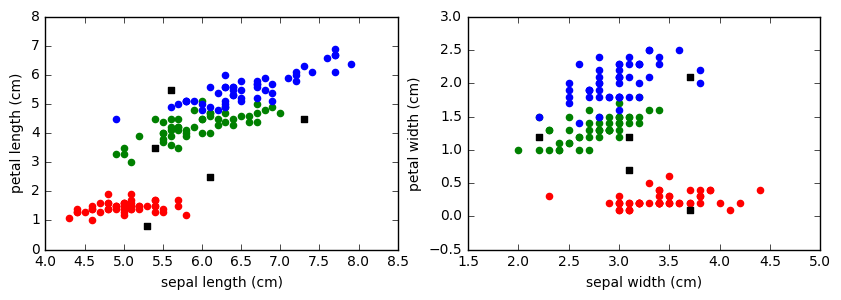

In [6]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,3))

colors = ['red', 'green', 'blue']

for specimen in range(3):  
    ax1.scatter(iris.data[iris.target==specimen][:,0], iris.data[iris.target==specimen][:,2],
                color=colors[specimen], label=iris.target_names[specimen])
    ax1.set_xlabel('sepal length (cm)')
    ax1.set_ylabel('petal length (cm)')
    
    ax2.scatter(iris.data[iris.target==specimen][:,1], iris.data[iris.target==specimen][:,3],
                color=colors[specimen], label=iris.target_names[specimen])
    ax2.set_xlabel('sepal width (cm)')
    ax2.set_ylabel('petal width (cm)')
    
ax1.scatter(new[:,0], new[:,2], color='black', marker='s')    
ax2.scatter(new[:,1], new[:,3], color='black', marker='s')    
    
plt.show()

We now use different classification algorithms to identify the species of these newly found specimen:

### k-Nearest Neighbors

This is one of the simplest classification algorithms: a datapoint of unknown classification is assigned the same classification that its k nearest neighbors share. In the trivial case of k=1, it is the same class as its nearest neighbor.

In order to implement the neighbor classification, we have to import the `KNeighborsClassifier` class from `sklearn` and define the algorithm we want to use (k=1 which is implemented as `n_neighbors`=1):

In [7]:
from sklearn.neighbors import KNeighborsClassifier
nn = KNeighborsClassifier(n_neighbors=1)

In the next step, we have to train the algorithm using our training sample (`iris.data`) and the class affiliations of the individual elements in the training sample (`iris.target`):

In [8]:
nn.fit(iris.data, iris.target) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

Now the classification algorithm is set up and we can predict the class affiliations for our new data sample elements:

In [9]:
new_types = nn.predict(new)
print iris.target_names[new_types]

['setosa' 'versicolor' 'versicolor' 'virginica' 'setosa']


We can check for ambiguities in the classification results using a built-in probability estimator that provides for each sample element the probability to be affiliated to either class that is available:

In [10]:
print nn.predict_proba(new)

[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]
 [ 1.  0.  0.]]


In the case of the Nearest Neighbor classifier, there are no ambiguities, since all probabilities are unity: each data sample element has one and only one nearest neighbor from the training sample.

We visually check the reliability of the nearest neigbor classifier by plotting the newly classified specimen:

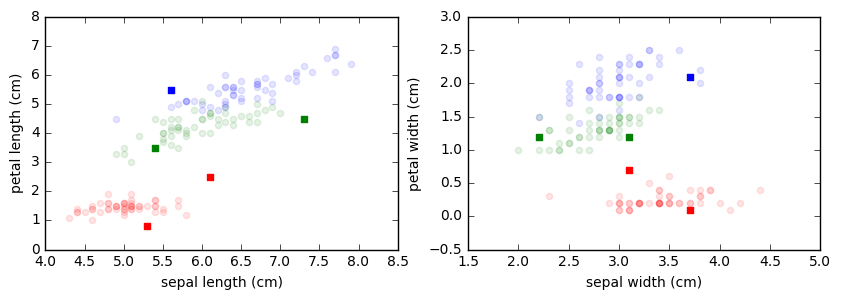

In [11]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,3))

colors = ['red', 'green', 'blue']

for specimen in range(3):  
    ax1.scatter(iris.data[iris.target==specimen][:,0], iris.data[iris.target==specimen][:,2],
                color=colors[specimen], label=iris.target_names[specimen], alpha=0.1)
    ax1.set_xlabel('sepal length (cm)')
    ax1.set_ylabel('petal length (cm)')
    
    ax2.scatter(iris.data[iris.target==specimen][:,1], iris.data[iris.target==specimen][:,3],
                color=colors[specimen], label=iris.target_names[specimen], alpha=0.1)
    ax2.set_xlabel('sepal width (cm)')
    ax2.set_ylabel('petal width (cm)')
    
for idx, obj in enumerate(new):
    ax1.scatter(obj[0], obj[2], color=colors[new_types[idx]], marker='s')    
    ax2.scatter(obj[1], obj[3], color=colors[new_types[idx]], marker='s')    
    
plt.show()

We can repeat this analysis using a k=10 Nearest Neighbor classifier:

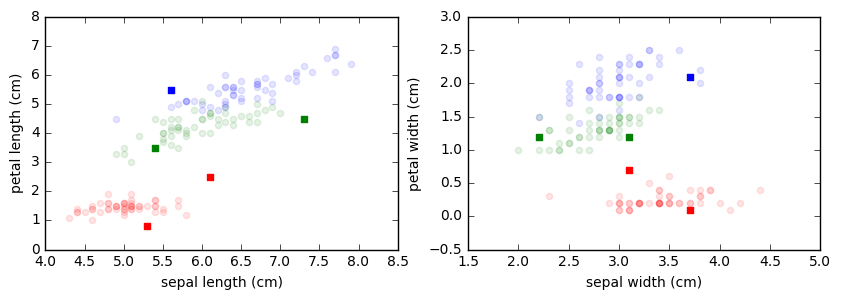

[[ 1.   0.   0. ]
 [ 0.   1.   0. ]
 [ 0.   1.   0. ]
 [ 0.   0.1  0.9]
 [ 0.7  0.3  0. ]]


In [12]:
from sklearn.neighbors import KNeighborsClassifier
nn = KNeighborsClassifier(n_neighbors=10)

nn.fit(iris.data, iris.target) 

new_types = nn.predict(new)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,3))

colors = ['red', 'green', 'blue']

for specimen in range(3):  
    ax1.scatter(iris.data[iris.target==specimen][:,0], iris.data[iris.target==specimen][:,2],
                color=colors[specimen], label=iris.target_names[specimen], alpha=0.1)
    ax1.set_xlabel('sepal length (cm)')
    ax1.set_ylabel('petal length (cm)')
    
    ax2.scatter(iris.data[iris.target==specimen][:,1], iris.data[iris.target==specimen][:,3],
                color=colors[specimen], label=iris.target_names[specimen], alpha=0.1)
    ax2.set_xlabel('sepal width (cm)')
    ax2.set_ylabel('petal width (cm)')
    
for idx, obj in enumerate(new):
    ax1.scatter(obj[0], obj[2], color=colors[new_types[idx]], marker='s')    
    ax2.scatter(obj[1], obj[3], color=colors[new_types[idx]], marker='s')    
    
plt.show()

print nn.predict_proba(new)

In the case of the k=10 Nearest Neighbor classifier, there is some ambiguity in the derived classifications. This is due to the fact that not all of the ten nearest neighbors from the training sample are of the same class. 

The k=1 case seems to be superior as there are no ambiguities. But this is delusive: there is one data sample element between the red and green clouds that might be equally attributed to either class. This is not reflected by the high probability in the k=1 case. By increasing the number of nearest neighbors, this ambiguity becomes obvious. Hence, the k=10 algorithm better reflects reality.

### Support Vector Machines

Support Vector Machines (SVM) are supervised learning models that use transformations of the physical problem space in such a way as to maximize the gap between the different classes in the training sample (see  https://en.wikipedia.org/wiki/Support_vector_machine for details). These transformations are based on kernels that use linear functions, polynomials, or any other kind of mathematical function. 

SVMs using different kinds of kernels are available in `sklearn`. We will use a linear SVM model to classify our data sample:

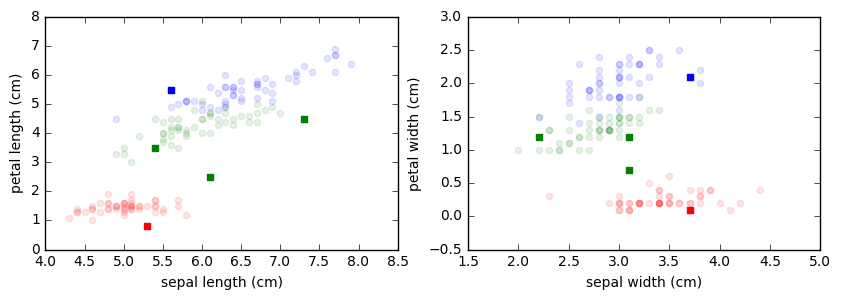

[[ 0.99449256  0.00271046  0.00279698]
 [ 0.0252385   0.96765736  0.00710414]
 [ 0.00524693  0.99205708  0.00269598]
 [ 0.01001033  0.01880705  0.97118262]
 [ 0.59577435  0.35508097  0.04914468]]


In [13]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', probability=True)
svm.fit(iris.data, iris.target) 

new_types = svm.predict(new)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,3))

colors = ['red', 'green', 'blue']

for specimen in range(3):  
    ax1.scatter(iris.data[iris.target==specimen][:,0], iris.data[iris.target==specimen][:,2],
                color=colors[specimen], label=iris.target_names[specimen], alpha=0.1)
    ax1.set_xlabel('sepal length (cm)')
    ax1.set_ylabel('petal length (cm)')
    
    ax2.scatter(iris.data[iris.target==specimen][:,1], iris.data[iris.target==specimen][:,3],
                color=colors[specimen], label=iris.target_names[specimen], alpha=0.1)
    ax2.set_xlabel('sepal width (cm)')
    ax2.set_ylabel('petal width (cm)')
    
for idx, obj in enumerate(new):
    ax1.scatter(obj[0], obj[2], color=colors[new_types[idx]], marker='s')    
    ax2.scatter(obj[1], obj[3], color=colors[new_types[idx]], marker='s')    
    
plt.show()

print svm.predict_proba(new)

Note how similar the syntax for the SVM model is compared to the NN method.

The results of the SVM are nearly identical to those using the Nearest Neighbor classifier, except for that one sample element that is subject to ambiguity. This is reflected by the class probabilities: this one datapoint has only a slightly larger probability to belong to class 0 than class 1, as reflected by the plots.

### Other Classifiers

`sklearn` provides a large number of different classifier algorithms:
* gaussian processes (http://scikit-learn.org/stable/modules/gaussian_process.html)
* naive Bayes (http://scikit-learn.org/stable/modules/naive_bayes.html)
* decision trees (http://scikit-learn.org/stable/modules/tree.html)
* supervised neural network models (http://scikit-learn.org/stable/modules/neural_networks_supervised.html)

The implementations of all these methods into `sklearn` are all very similar, allowing for quick switches between substantially different models. It depends on the structure of the data sample which model performs better. It is always worth trying different classifier methods to find the one that is most appropriate for the given problem.